In [1]:
from SpinJupyterEnvironment import *

Connecting to bastion host for SSH tunnel...  connected.
Connecting to SQL server...  connected.


In [2]:
%sql select count(1) from dv_upcache.dv_upcache

1 rows affected.


count(1)
233254


In [5]:
result = db.execute('''
SELECT
  FROM_UNIXTIME(day) AS date,
  sum(dau) AS dau
FROM dv_upcache.dv_sessions_daily_summary
WHERE day >= UNIX_TIMESTAMP() - 30*86400
GROUP BY date
ORDER BY day ASC''').fetchall()

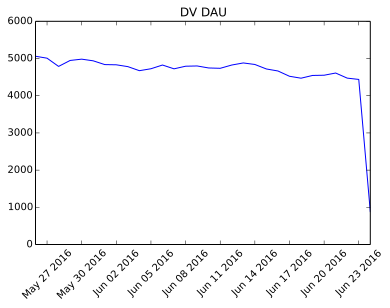

In [4]:
plt.plot([x[0] for x in result], [x[1] for x in result])
plt.xticks(rotation=45)
plt.title('DV DAU')
plt.show()